<b>The process of organising objects into groups whose member are similar in some way</b>

* The K-Means algorithm searches for a predetermined number of clusters within an unlabeled multidimensional dataset

* Those two assumptions are the basis of the K-Means Model

1. The "Cluster center" is the arithmetic mean of all the points belonging to the cluster
2. Each point is closer to its own cluster center than to other clustering centers

*  <b>   Generate a two dimensional dataset containing four distinct blobs</b>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
sns.set()   #for plot stayling
%matplotlib inline

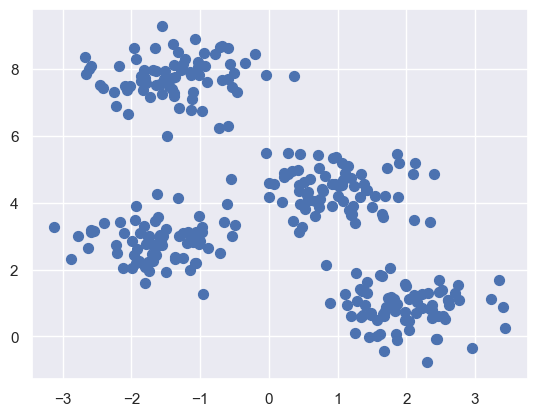

In [2]:
from sklearn.datasets import make_blobs

X , y_true = make_blobs(n_samples = 300, centers = 4, 
                       cluster_std = 0.60 , random_state = 0)
plt.scatter(X[: , 0] , X[:,1], s= 50)

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

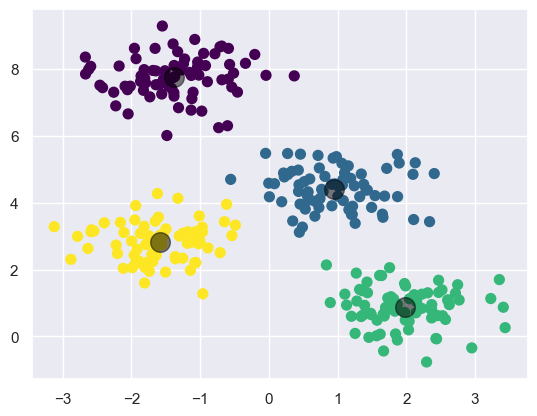

In [4]:
plt.scatter (X[:, 0], X[:,1], c = y_kmeans , s=50, cmap = "viridis")

centers = kmeans.cluster_centers_
plt.scatter(centers[: , 0], centers[: , 1] , c = "black" , s= 200 , alpha = 0.5)

In [5]:
kmeans.cluster_centers_

array([[-1.37324398,  7.75368871],
       [ 0.94973532,  4.41906906],
       [ 1.98258281,  0.86771314],
       [-1.58438467,  2.83081263]])

[[ 0.27239604  5.46996004]
 [-1.36999388  7.76953035]
 [ 0.08151552  4.56742235]
 [-0.6149071   3.94963585]]
[[ 0.996244    5.28262763]
 [-1.39262004  7.7943098 ]
 [ 1.26533912  3.65658566]
 [-0.03528305  1.93369899]]
[[ 0.996244    5.28262763]
 [-1.39262004  7.7943098 ]
 [ 1.26533912  3.65658566]
 [-0.03528305  1.93369899]]


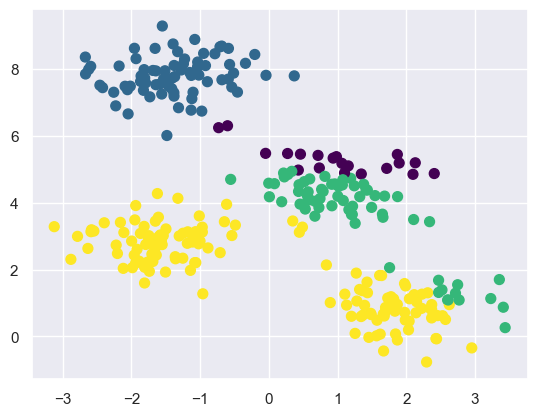

In [6]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X , n_clusters, rseed = 2):
    # 1 randomly Choose cluster
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    print(centers)
    
    while True:
        #2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X , centers)
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        print(new_centers)
        #2c. Check the convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        print(centers)
        
        return centers , labels
    
centers, labels = find_clusters(X , 4)
plt.scatter(X[: , 0] , X[: , 1] , c= labels, s =50 , cmap = 'viridis')           

### Caveats of expection - Maximization

### 1 The Globally optimal result may not be achieved

<b>First, although the E-M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the global best solution. For example, if we use a different random seed in our simple procedure, the particular starting guesses lead to poor result:</b>  

[[1.07627418 4.68480619]
 [2.47019077 1.31451315]
 [1.24258802 4.50399192]
 [2.5270643  0.6178122 ]]
[[-1.02053394  5.33759029]
 [ 1.85843325  1.34057553]
 [ 0.81594697  3.67185725]
 [ 2.02488729  0.42951967]]
[[-1.02053394  5.33759029]
 [ 1.85843325  1.34057553]
 [ 0.81594697  3.67185725]
 [ 2.02488729  0.42951967]]


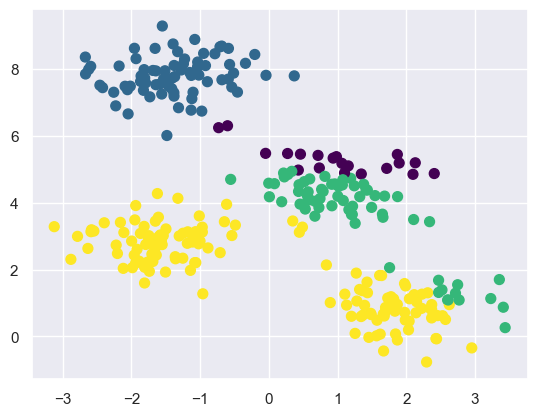

In [7]:
centers, lables = find_clusters(X, 4, rseed = 0)
plt.scatter(X[:, 0], X[:, 1], c= labels, 
           s= 50, cmap = 'viridis')

### 2 The number of clusters must be selected beforehand.
<b> 
    Another common challenge  with k-means is  that you must tell it how many clusters you except: it cannot learn the number of cluster from the data. For example, if we ask the algorithm to identify six clusters, it will happily proceed and find the best six clusters </b>

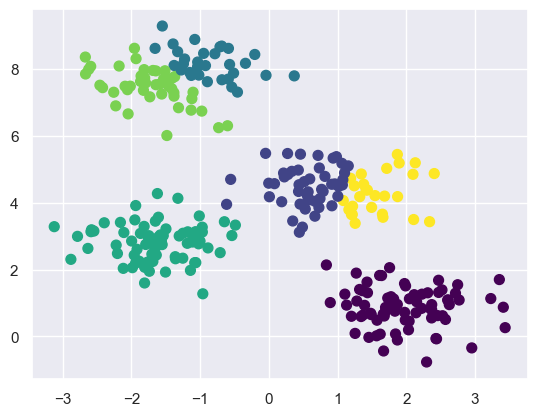

In [8]:
labels = KMeans(6, random_state = 0).fit_predict(X)
plt.scatter(X[:, 0], X[:,1], c= labels, s= 50 , cmap = "viridis")

### Selecting the number of clusters with silhouette analysis on KMeans clustering

<b> Silhouette analysis can be used to study the seperation distance between the resulting clusters. The silhouette plot display a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to access parameters like number of clusters visually.
 Silhouette Coefficient 
   
* +1 - the sample is far away from the neighbouring cluster
* 0 sample is on or very close to the decision boundary
* -1 Sample might have assign to the wrong cluster
</b>



In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as cm

In [10]:
print(__doc__)

Automatically created module for IPython interactive environment


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


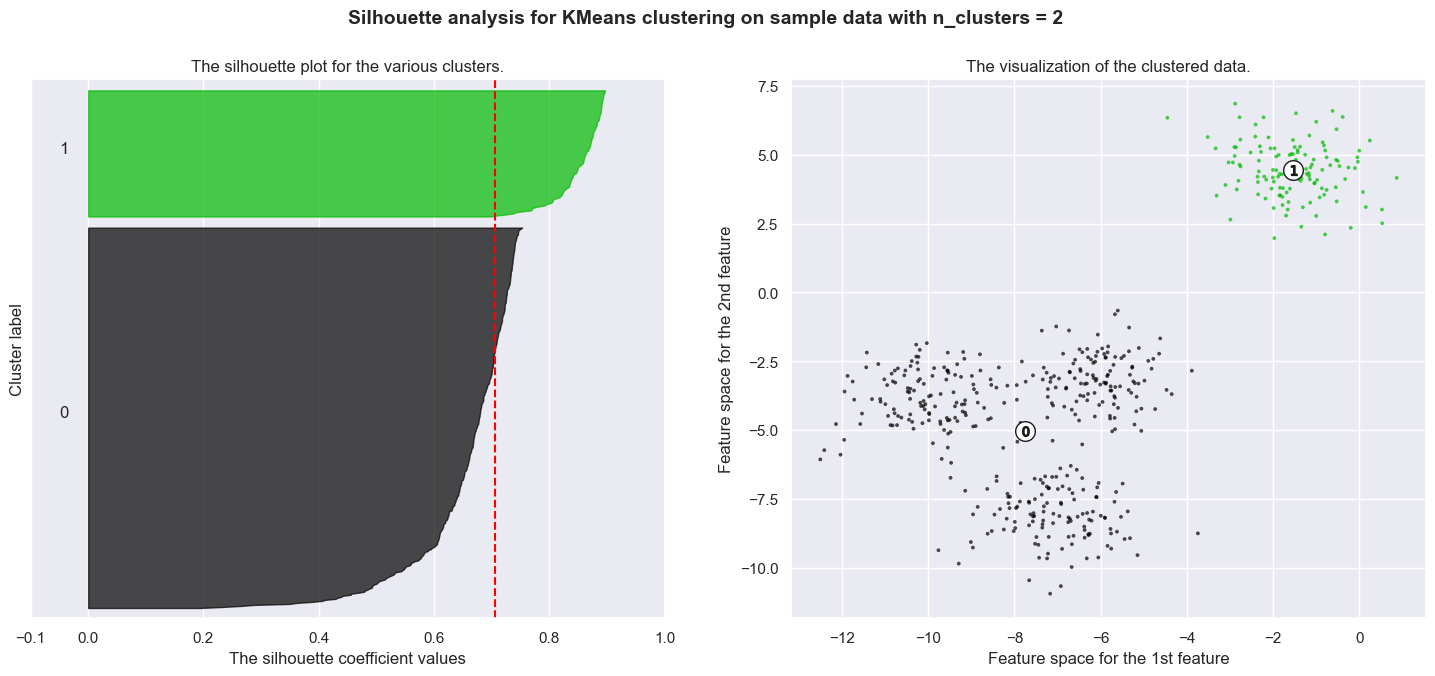

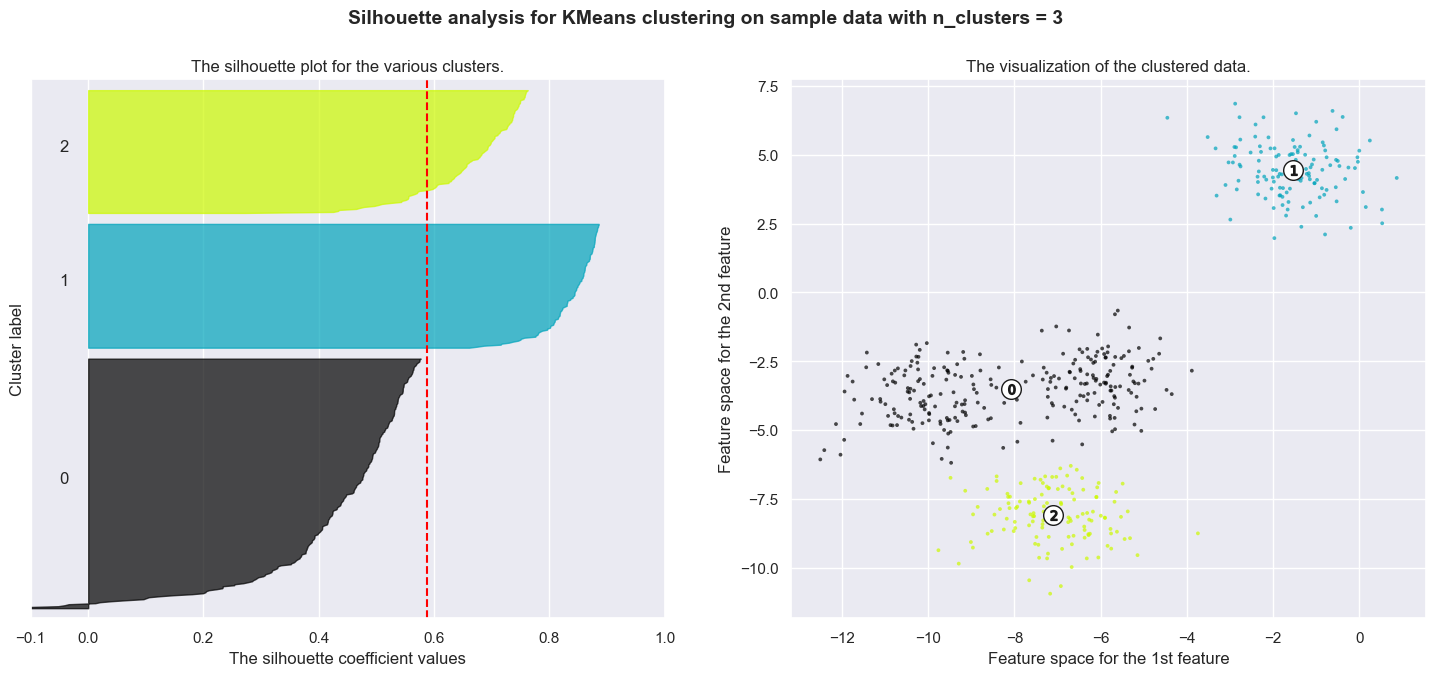

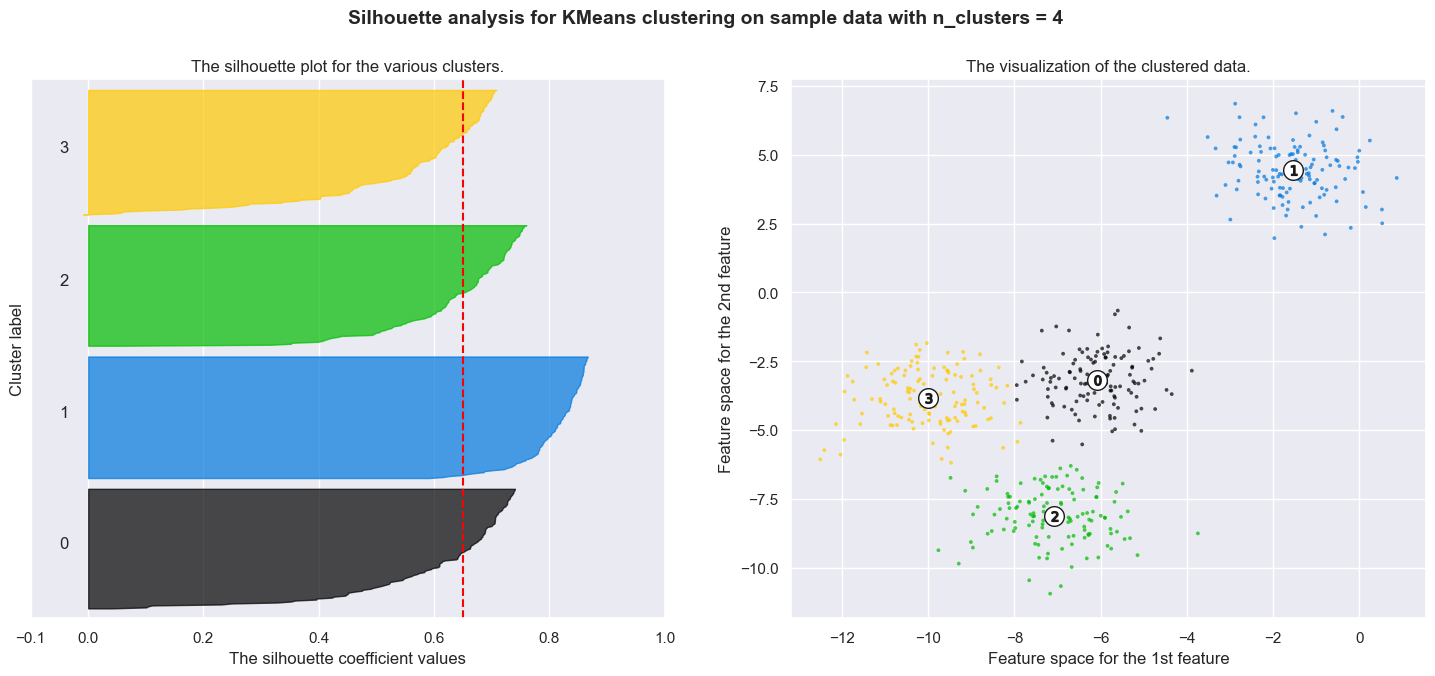

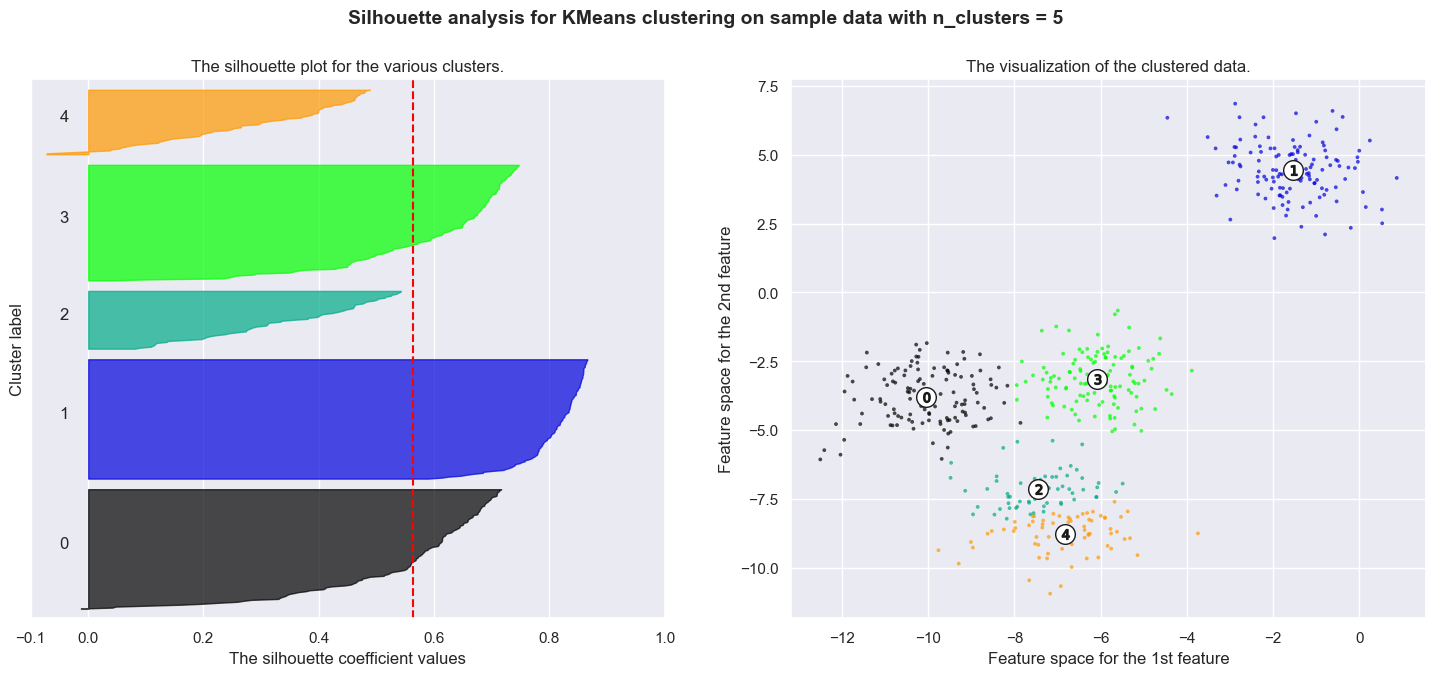

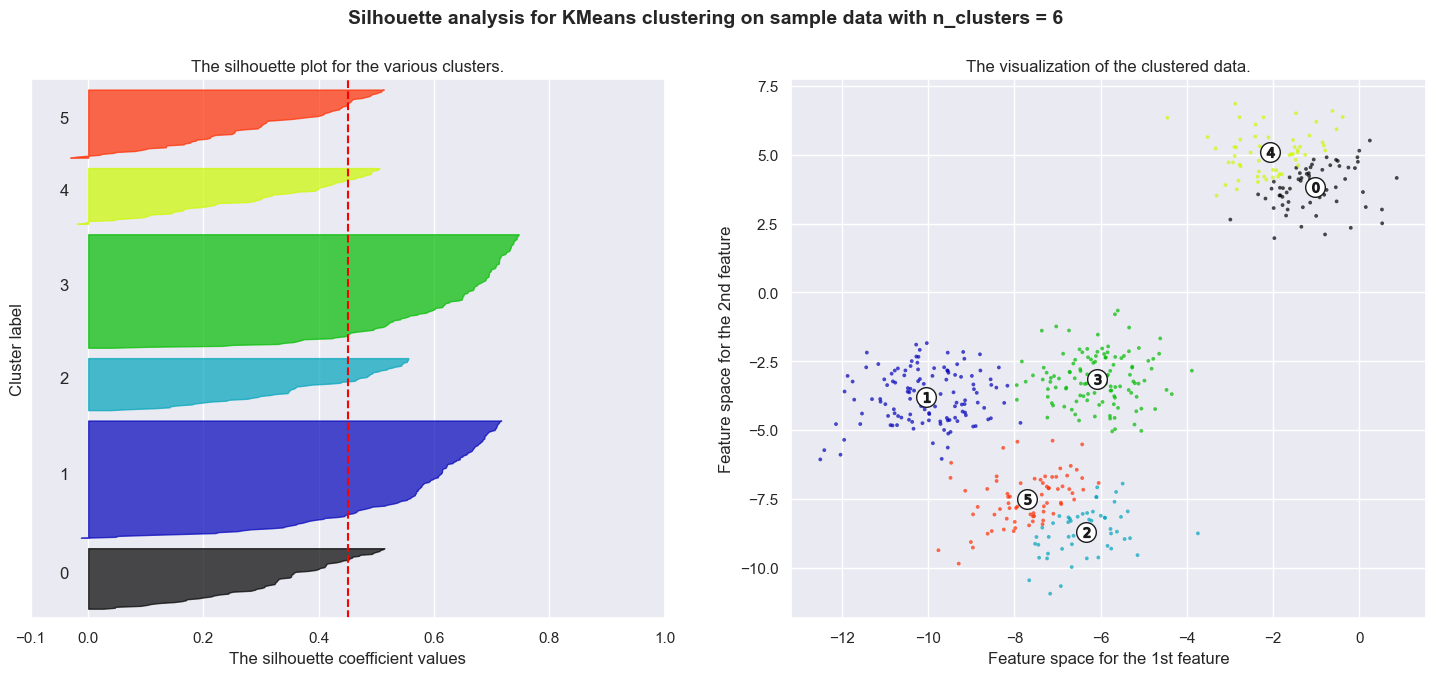

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()